In [1]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df=pd.read_csv(r"C:\Users\user\Documents\Swinfy\Swinfy_ML\ecommerce_sales_data.csv")

In [4]:
df.head()

,Date,Website_Traffic,Ad_Spend,Product_Discount,Customer_Rating,Sales_Revenue
0,1/1/2023,1360,3281.13,30.16,4.1,9003.82
1,1/2/2023,4272,3755.62,12.27,2.8,16318.64
2,1/3/2023,3592,2958.51,19.46,4.1,14232.43
3,1/4/2023,966,4814.65,14.43,5.0,9023.94
4,1/5/2023,4926,1936.87,17.78,2.6,14675.79


In [5]:
X = df[["Website_Traffic", "Ad_Spend", "Product_Discount", "Customer_Rating"]]
y = df["Sales_Revenue"]

In [6]:
X


,Website_Traffic,Ad_Spend,Product_Discount,Customer_Rating
0,1360,3281.13,30.16,4.1
1,4272,3755.62,12.27,2.8
2,3592,2958.51,19.46,4.1
3,966,4814.65,14.43,5.0
4,4926,1936.87,17.78,2.6
...,...,...,...,...
495,1743,2642.70,34.48,4.1
496,4209,330.13,33.83,3.6
497,1581,914.79,10.78,4.1
498,955,3716.36,32.94,4.5


In [7]:
y

0       9003.82
1      16318.64
2      14232.43
3       9023.94
4      14675.79
         ...   
495     8888.64
496    12133.19
497     4981.66
498     7758.15
499     4421.18
Name: Sales_Revenue, Length: 500, dtype: float64

In [8]:
# Split into training and testing sets (80% train, 20% test)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

In [9]:
# Predict on the test set
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [10]:
#Prediction on testing data
y_pred=model.predict(X_test)

In [11]:
#Evaluate the model
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

In [12]:
# Output model evaluation metrics
print("Mean Absolute Error (MAE):", round(mae,2))
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared Score (R²):", r2)

Mean Absolute Error (MAE): 400.6
Root Mean Squared Error (RMSE): 508.7369216568627
R-squared Score (R²): 0.9849353810815351


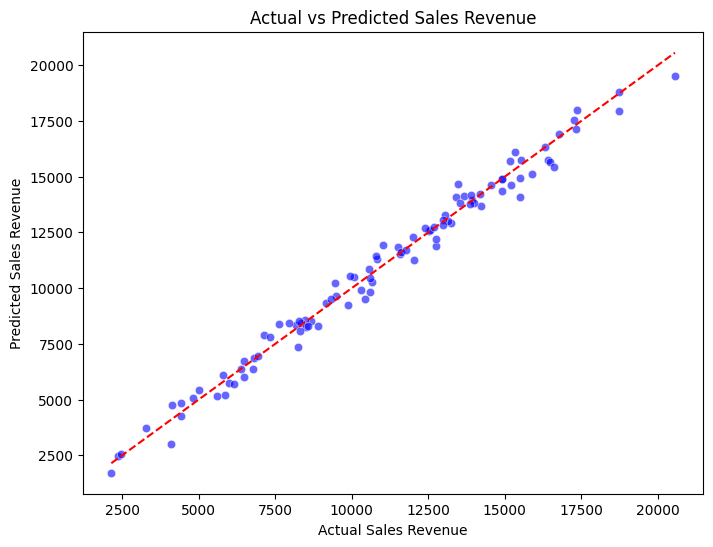

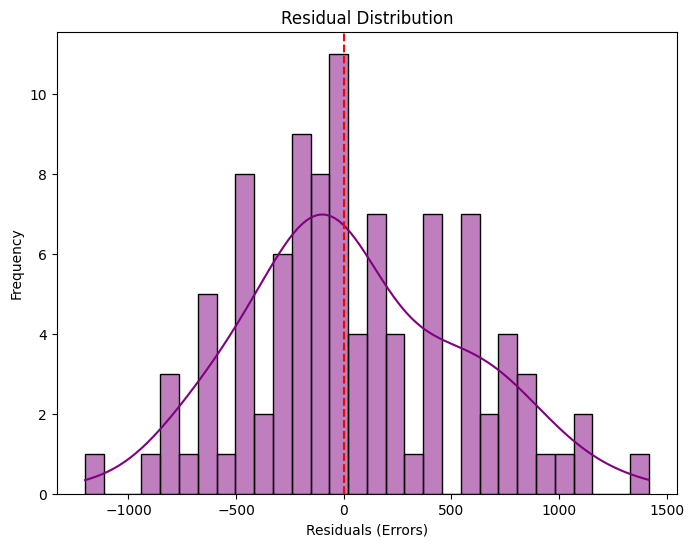

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot: Actual vs. Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # Perfect predictions line
plt.xlabel("Actual Sales Revenue")
plt.ylabel("Predicted Sales Revenue")
plt.title("Actual vs Predicted Sales Revenue")
plt.show()

# Residual Plot
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color="purple")
plt.axvline(0, color='red', linestyle="--")
plt.xlabel("Residuals (Errors)")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()
